## NOTEBOOK 01

In this notebook we are going to have an introduction to pseudo-random number generator and, in the second part, we will se how to implement one of the earliest usage of random sampling: the Buffon experiment. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 01.1

- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$.

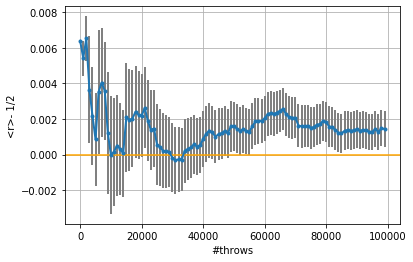

In [6]:
#Create the plot of the first point of Exercise 01.1

data1=open('data/r_mean.txt','r').read().split('\n')

data1=[x.split(' ') for x in data1]


x= np.zeros(len(data1)-1)
y= np.zeros(len(data1)-1)
y_err= np.zeros(len(data1)-1)

for i in range(len(data1)-1):
    x[i]=data1[i][0]
    y[i]=data1[i][1]
    y_err[i]=data1[i][2]
    
plt.errorbar(x,y-0.5,yerr=y_err,marker=".",lw=2,ecolor='gray')
plt.axhline(0.00,color='orange')
plt.xlabel('#throws')
plt.ylabel('<r>- 1/2')
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$

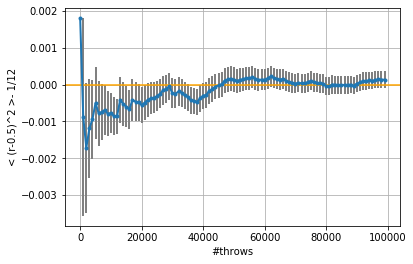

In [8]:
#Create the plot of the second point of Exercise 01.1

data2=open('data/r_var.txt','r').read().split('\n')

data2=[x.split(' ') for x in data2]

x= np.zeros(len(data2)-1)
y= np.zeros(len(data2)-1)
y_err= np.zeros(len(data2)-1)

for i in range(len(data2)-1):
    x[i]=data2[i][0]
    y[i]=data2[i][1]
    y_err[i]=data2[i][2]
    
plt.errorbar(x,y-(1/12),yerr=y_err,marker=".",lw=2,ecolor='gray')
plt.axhline(0.00,color='orange')
plt.xlabel('#throws')
plt.ylabel('< (r-0.5)^2 >- 1/12')
plt.grid(True)
plt.show()



3. Calculate the $\chi^{2}$ of the uniform distribution in order to verify that is indeed a uniform distribution. This is accomplished by dividing the \[0,1\] interval in $M=10^2$, generating $M$ times $ n$ pseudo random number and then calculating 

$$
\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}
$$

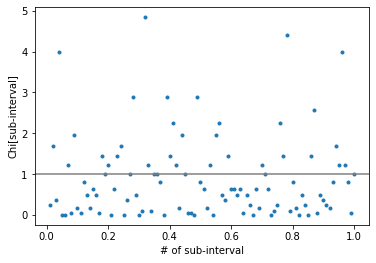

In [10]:
#Create the plot of the chi-squared for each of the M intervals and calculate the sum
n= 10000
M= 100

data3=open('data/chi_data.txt','r').read().split(',')
chi_vect=[float(x) for x in data3]


x=[(i+1)/len(data3) for i in range(len(data3))]

plt.plot(x,chi_vect,marker=".",linestyle="None")
plt.axhline(1,color="grey")
plt.xlabel('# of sub-interval')
plt.ylabel('Chi[sub-interval]')
plt.show()
plt.close()

The value of the $\chi^{2}$ found is 

In [11]:
chi=sum(chi_vect)
print(chi)

89.97999999999999


### Exercise 01.2

For this exercise, we have modified the parallel random number generator in order to make it generate numbers extracted from an exponential distribution and a Cauchy - Lorentz distribution, starting from a uniform distribution in $[0,1]$, by using the inversion of the cumulative distribution.

What we did next was to plot the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice, an *exponential* dice (using $\lambda=1$) and a *Lorentzian* dice (using $\mu=0$ and $\Gamma=1$).

In [12]:
# Obtain the data
data4=open("data/dice_data.txt","r").read().split("\n")

#for i in range(len(data4)):
data4=[x.split(",") for x in data4]

for i in range(len(data4)-1):
    data4[i]=[float(x) for x in data4[i]]
    
# Now data4 is a 2x2 matrix containing all the data that we need

#### Standard dice

First we plot the histograms of the standard dice

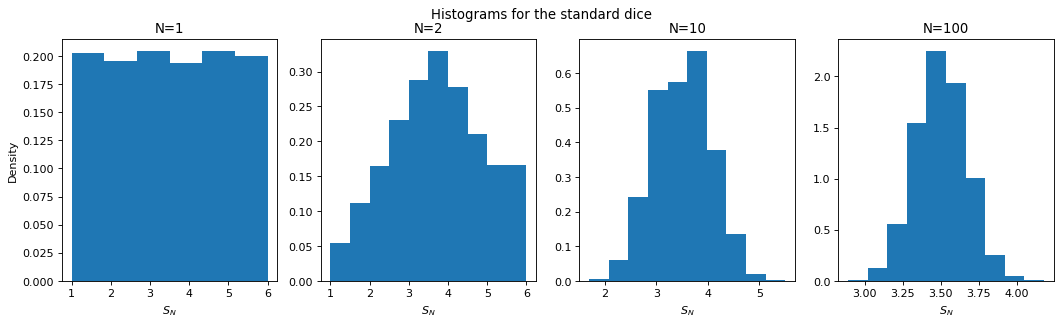

In [13]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(16,4),dpi=80)
ax1.hist(data4[0],bins=6,align='mid',density=True)
ax1.set_title('N=1')
ax1.set(xlabel='$S_N$', ylabel='Density')
ax2.hist(data4[1],density=True)
ax2.set_title('N=2')
ax2.set(xlabel='$S_N$')
ax3.hist(data4[2],density=True)
ax3.set_title('N=10')
ax3.set(xlabel='$S_N$')
ax4.hist(data4[3], density=True)
ax4.set_title('N=100')
ax4.set(xlabel='$S_N$')


fig.suptitle("Histograms for the standard dice")
plt.show()
plt.close()



#### Exponential dice 

Then we plot the number extracted from an "Exponential dice". Note that, since the exponential distribution has a finite variance, the distribution to which the distribution of the means will converge is a Gaussian distribution, as in the uniform case.

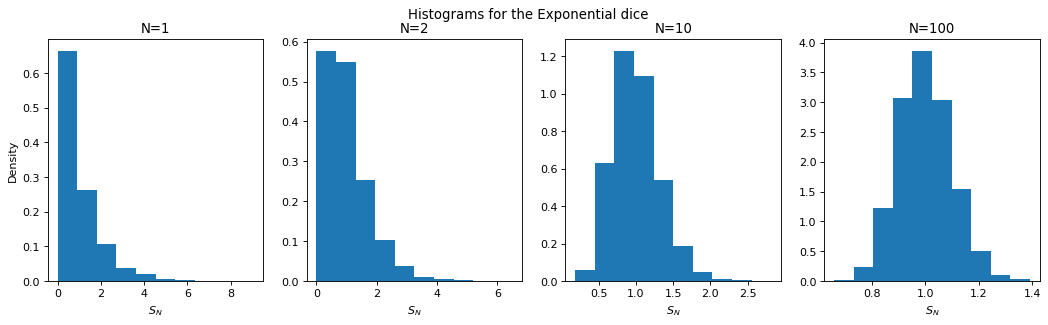

In [15]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(16,4),dpi=80)
ax1.hist(data4[4],density=True)
ax1.set_title('N=1')
ax1.set(xlabel='$S_N$', ylabel='Density')
ax2.hist(data4[5],density=True)
ax2.set_title('N=2')
ax2.set(xlabel='$S_N$')
ax3.hist(data4[6],density=True)
ax3.set_title('N=10')
ax3.set(xlabel='$S_N$')
ax4.hist(data4[7],density=True)
ax4.set_title('N=100')
ax4.set(xlabel='$S_N$')

fig.suptitle("Histograms for the Exponential dice")
plt.show()
plt.close()

#### Lorentzian dice

Finally, we plot the number extracted from the "Lorentzian dice". In this case, we know that the distribution has infinite variance, so doesn't fulfill the hyptesis of the CLT. The distribution of the means will not converge to a Gaussian distribution, but to a distribution that follows the Levy law.

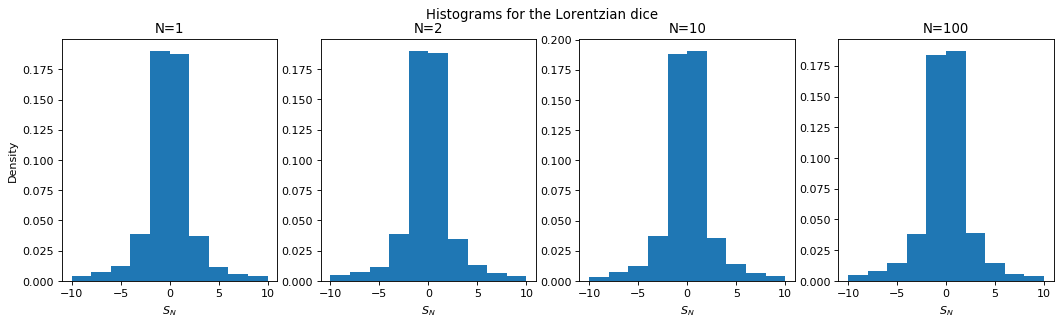

In [16]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(16,4),dpi=80)
ax1.hist(data4[8],range=(-10,10),density=True)
ax1.set_title('N=1')
ax1.set(xlabel='$S_N$', ylabel='Density')
ax2.hist(data4[9],range=(-10,10),density=True)
ax2.set_title('N=2')
ax2.set(xlabel='$S_N$')
ax3.hist(data4[10],range=(-10,10),density=True)
ax3.set_title('N=10')
ax3.set(xlabel='$S_N$')
ax4.hist(data4[11],range=(-10,10),density=True)
ax4.set_title('N=100')
ax4.set(xlabel='$S_N$')

fig.suptitle("Histograms for the Lorentzian dice")
plt.show()
plt.close()

### Exercise 01.3

In this exercise we want to replicate the Buffon experiment to estimate $\pi$, the approach is the following:

- we have to set the problem: it's useless to consider a lot of lines with a distance $d$ and generate four points describing the two extreme points of the needle, let's reduce to the really important quantities, i.e. to the maximum distance that the midpoint of the needle can have from a line $0<x<\frac{d}{2}$ , the angle $\theta$ it forms with the x axis and the lenght $l$ of the needle itself.

- a simple class *Needle* was created,that contains the position of the midpoint of the needle $x$, the angle $\theta \in [0,\pi/2]$ that it forms with the x axis and also $l$ the lenght of the needle. This class can be initialized and then it is able to check if the needle intersects the lines or not by considering if $|\frac{l}{2}\cos(\theta)|>x$

- Calculating for every block containing $L=10^{4}$ throws the quantity $\frac{2Ll}{n_{check}d}$, where $n_{check}$ is the number of times the thrown needle intersects the line, we have an esitimation of $\pi$. Then the final value with associated error are calculated with the standard blocking method (total number of throws $N=10^{6}$).


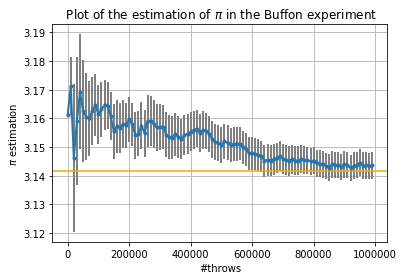

In [18]:
##Create the plot of the estimation of pi with the relative errors calculated in a Monte Carlo simulation

data5=open('data/Buffon.txt','r').read().split('\n')

data5=[x.split(' ') for x in data5]


x= np.zeros(len(data5)-1)
y= np.zeros(len(data5)-1)
y_err= np.zeros(len(data5)-1)

for i in range(len(data5)-1):
    x[i]=int(data5[i][0])
    y[i]=float(data5[i][1])
    y_err[i]=float(data5[i][2])
    
plt.errorbar(x,y,yerr=y_err,marker=".",lw=2,ecolor='gray')
plt.title(" Plot of the estimation of $\pi$ in the Buffon experiment")
plt.xlabel('#throws')
plt.ylabel('$\pi$ estimation')

plt.axhline(3.1415,color="orange")
plt.grid(True)
plt.show()